In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
from pathlib import Path

project_root = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
os.chdir(project_root)
print(f"Working directory: {os.getcwd()}")

Working directory: /Users/benji-qu/Projects/wands-product-search


In [4]:
old_dataset = pd.read_csv("data/input/product.csv", sep="\t")

In [5]:
old_dataset.sample(5)

,product_id,product_name,product_class,category hierarchy,product_description,product_features,rating_count,average_rating,review_count
42226,42226,correen task chair,Office Chairs,Furniture / Office Furniture / Office Chairs,this armless chair is constructed of deluxe pu...,warrantylength:5 years|chairbackwidth-sidetosi...,110.0,4.5,71.0
30623,30623,bellview resin stacked flagstone fountain with...,Fountains,NaN,modern design tier fountain is the perfect add...,overallproductweight:13.2|productcare : dry or...,26.0,4.5,23.0
25902,25902,twig garland,NaN,Décor & Pillows / Flowers & Plants / Garlands ...,realistic faux twig garland adds a rustic natu...,color : brown/green|holidayoccasion : no holid...,16.0,5.0,12.0
9826,9826,4-tier shelves industrial writing for home off...,Computer & Training Tables|Desks,Furniture / Office Furniture / Desks,NaN,basecolor : brown|numberofexteriorshelves:4|wo...,1.0,5.0,1.0
31259,31259,chiang 40 '' wide tufted full grain leather cl...,Accent Chairs,Furniture / Living Room Furniture / Chairs & S...,for sleek sophistication and understated elega...,backfillmaterial : polyester|backtype : loose ...,60.0,5.0,45.0


In [6]:
len(old_dataset["product_class"].unique())

861

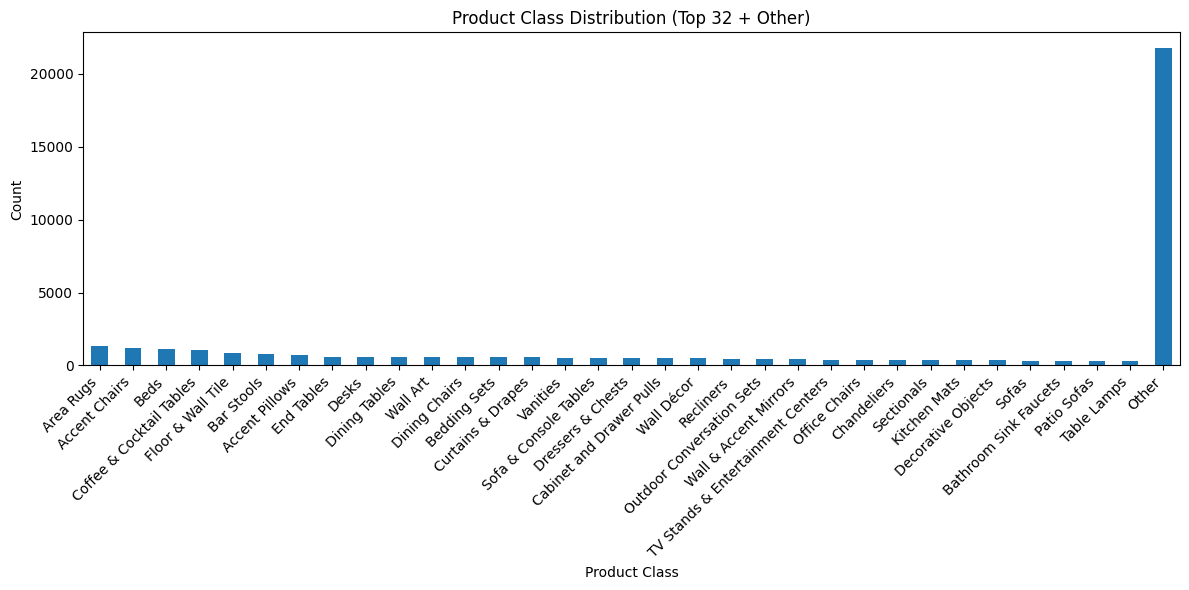

In [7]:
k = 32
product_class = old_dataset["product_class"]
product_class_counts = product_class.value_counts()
top_10_classes = product_class_counts.head(k)
other_classes = product_class_counts.iloc[k:].sum()

plot_data = pd.concat([top_10_classes, pd.Series({"Other": other_classes})])

plt.figure(figsize=(12, 6))
plot_data.plot(kind="bar")
plt.title(f"Product Class Distribution (Top {k} + Other)")
plt.xlabel("Product Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [8]:
unique_product_classes = old_dataset["product_class"].unique()
with open("data/input/price_mappings.jsonl", "w", encoding="utf-8") as f:
    for pc in unique_product_classes:
        str_to_write = f'{{"{pc}": {{"price_min": 0, "price_max": 0}}}}\n'
        f.write(str_to_write)


<Axes: >

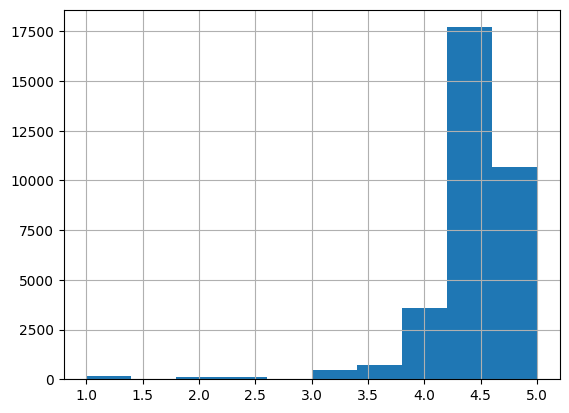

In [9]:
average_rating = old_dataset["average_rating"]

average_rating.hist()

Text(0.5, 1.0, 'Rating Count Distribution')

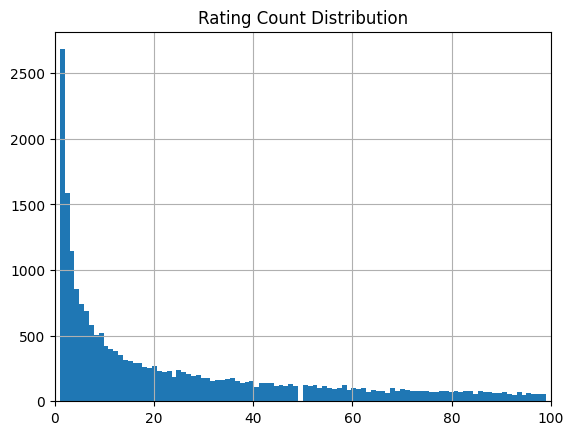

In [10]:
rating_count = old_dataset["rating_count"]

rating_count[rating_count < 100].hist(bins=100)
plt.xlim(0, 100)
plt.title("Rating Count Distribution")

Text(0.5, 1.0, 'Review Count Distribution')

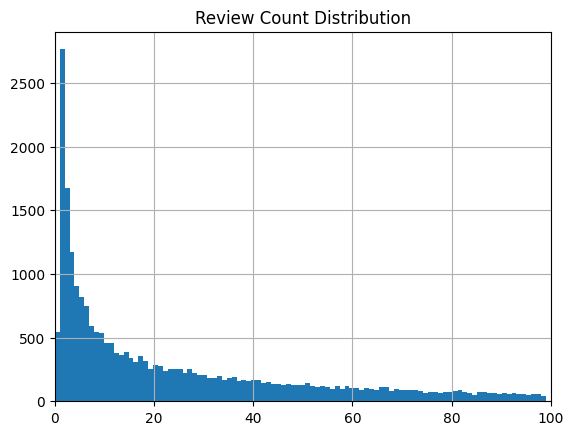

In [11]:
review_count = old_dataset["review_count"]
review_count[review_count < 100].hist(bins=100)
plt.xlim(0, 100)
plt.title("Review Count Distribution")

In [12]:
dataset = pd.read_json("data/output/products.jsonl", lines=True)

In [13]:
dataset[dataset["price"].isna()]["product_class"].unique()

array([], dtype=object)

In [14]:
dataset.price.describe()

count    10100.000000
mean       690.289604
std        676.184758
min          0.000000
25%        225.000000
50%        500.000000
75%        950.000000
max       5600.000000
Name: price, dtype: float64

In [15]:
dataset.sample(10)

,product_id,product_name,product_description,product_class,material,style,color,rating_count,average_rating,countryoforigin,price
1474,product_1475,chaplecroft 27 '' table lamp,bring a splash of nautical charm to your livin...,Table Lamps,"[fabric, resin]","[coastal, nautical, traditional]",[cream],1219,4.500000,[China],200
8941,product_8942,ajhtahag coffee table,set the tone for a 21st-century seating ensemb...,Coffee Tables,[chrome],[modern],[gray],158,4.500000,[China],775
4351,product_4352,sisco 28 '' wide tufted velvet armchair,this channel tufting velvet accent chair is a ...,Accent Chairs,"[foam, velvet, metal]",[glam],[gold],1620,5.000000,[China],775
2432,product_2433,kitchen canister jar,"kitchen canister jar, Canisters & Jars, clear,...",Canisters,[glass],"[coastal, nautical, traditional]",[clear],7468,5.000000,[China],125
4143,product_4144,lilianna tufted upholstered platform bed,this platform bed brings traditional french-co...,Beds,[foam],[traditional],[gray],704,4.500000,[Malaysia],1300
2671,product_2672,bar unit black,"heavy on the modern elegance scale , the desig...",Bar Sets,[glass],[modern],[black],1991,4.000000,[Taiwan],1100
1544,product_1545,surrender of lord cornwallis at yorktown 1781 ...,this exact replica ( reduced from original siz...,Wall Art,"[wood, paper]",[traditional],[black],4774,4.525538,[USA],275
4287,product_4288,heer 30.75 '' wide manual club recliner with m...,"sit back , relax , and let the vibrating heate...",Recliners,"[wood, metal, foam]","[traditional, transitional]","[blue, brown]",254,4.500000,[China],1000
118,product_119,mitchem adirondack patio chair with cushions,bring contemporary style to your patio or porc...,Accent Chairs,"[plastic, polyester]",[modern],[beige],972,4.500000,[Vietnam],600
3753,product_3754,jarra 35 '' wide faux leather manual standard ...,this 360-degree swivel recliner is the perfect...,Recliners,"[faux leather, foam, plastic]","[traditional, transitional]",[black],3028,4.000000,[China],800


In [16]:
dataset.iloc[42].to_json()

'{"product_id":"product_43","product_name":"roundhouse low side table","product_description":"wood on top . wire on the bottom . functional eye-pleasing magic everywhere . three shapes . three finishes and a kicky take on simplicity to boot .","product_class":"Living Room Table Sets","material":["steel"],"style":["modern"],"color":["black"],"rating_count":3701,"average_rating":5.0,"countryoforigin":["China"],"price":1200}'

In [17]:
product_class = dataset["product_class"]
product_class.value_counts().head(10)

product_class
Accent Chairs        866
Area Rugs            520
Beds                 460
Bar Stools           445
Coffee Tables        444
Dining Chairs        335
Office Chairs        266
Dressers             259
Conversation Sets    244
Desks                237
Name: count, dtype: int64

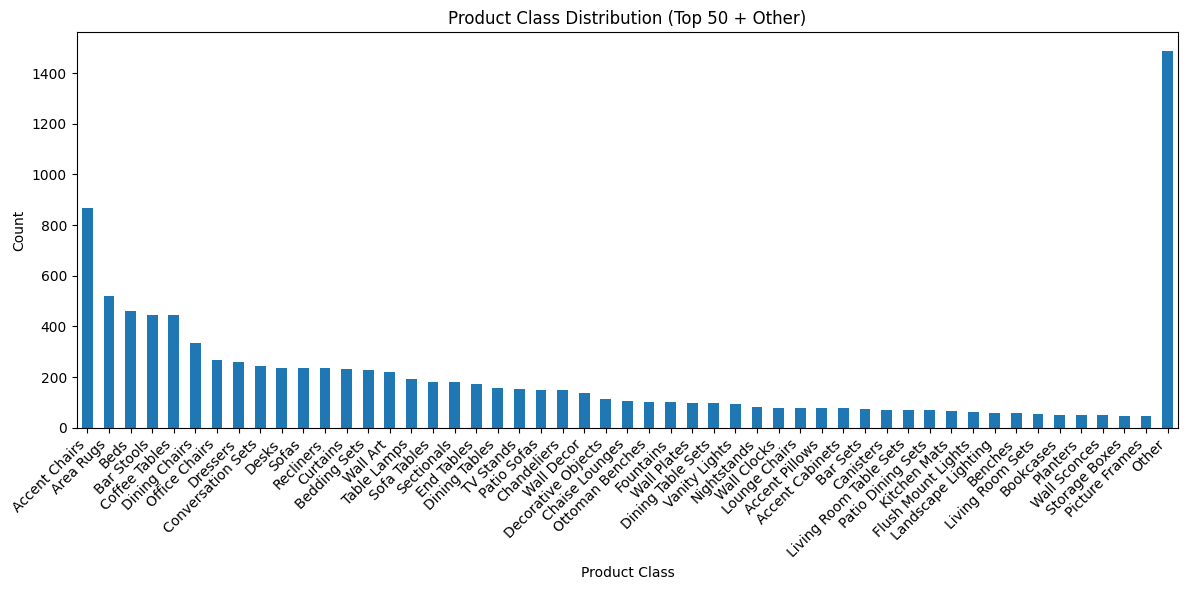

In [31]:
k = 50
product_class = dataset["product_class"]
product_class_counts = product_class.value_counts()
top_10_classes = product_class_counts.head(k)
other_classes = product_class_counts.iloc[k:].sum()

plot_data = pd.concat([top_10_classes, pd.Series({"Other": other_classes})])

plt.figure(figsize=(12, 6))
plot_data.plot(kind="bar")
plt.title(f"Product Class Distribution (Top {k} + Other)")
plt.xlabel("Product Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [19]:
top_k_sum = product_class.value_counts().head(k).sum()
print(f"Total number of products in the top {k} product classes: {top_k_sum}")

Total number of products in the top 35 product classes: 7717


In [20]:
product_class.value_counts().tail(60)

product_class
Hall Trees                                3
Beverage Servers                          3
Bean Bags                                 3
Crib Bedding Sets                         3
Teen Lounge Furniture                     2
Bedding Accessories                       2
Coasters                                  2
Electric & Alternative Fuel Fireplaces    2
Patio Benches                             2
Coffee Makers                             2
Serving Bowls                             2
Adirondack Chairs                         2
Porch Swings                              2
Utensil Crocks                            2
Kids Tables                               2
Bird Feeders                              2
Home Theater                              2
Game Chairs                               2
Bird Baths                                2
Outdoor Flush Mounts                      2
Accent Tiles                              2
Plates                                    2
Tapestries        

In [21]:
product_class.unique()

array(['Sofas', 'Dressers', 'Decorative Objects', 'Chaise Lounges',
       'Desks', 'Dining Chairs', 'TV Stands', 'Office Chairs',
       'Canisters', 'Planters', 'Recliners', 'Benches', 'Accent Chairs',
       'Bedding Sets', 'Dining Tables', 'Serving Platters',
       'Patio Chaise Lounges', 'Lounge Chairs', 'Living Room Table Sets',
       'Bar Stools', 'Stackable Chairs', 'Ottoman Benches', 'Fountains',
       'Area Rugs', 'Nightstands', 'Bar Sets', 'Rocking Chairs',
       'Sectionals', 'Dining Table Sets', 'Beds', 'Patio Sofas',
       'Garden Statues', 'Garden Accents', 'Patio Dining Sets',
       'Sofa Tables', 'Chandeliers', 'Curtains', 'Lighting Shades',
       'Kitchen Islands', 'Coat Racks', 'Conversation Sets',
       'Patio Tables', 'Wall Decor', 'Coffee Tables', 'End Tables',
       'Furniture Cushions', 'Plant Tables', 'Table Lamps', 'Wall Art',
       'Kids Chairs', 'Wall Clocks', 'Accent Cabinets', 'Wreaths',
       'Headboards', 'Vases', 'Storage Boxes', 'Daybeds',
 

In [22]:
style = dataset["style"]
all_styles = set([item for sublist in style for item in sublist])
from collections import Counter

style_counter = Counter()
for style_list in style:
    style_counter.update(style_list)

top_styles = style_counter.most_common(10)
print("Top 10 most common styles:")
for style_name, count in top_styles:
    print(f"{style_name}: {count}")

# Calculate total unique styles
total_unique_styles = len(style_counter)
print(f"\nTotal unique styles: {total_unique_styles}")

# Calculate percentage distribution
total_style_occurrences = sum(style_counter.values())
print(f"Total style occurrences: {total_style_occurrences}")

print("\nStyle distribution (top 10):")
for style_name, count in top_styles:
    percentage = (count / total_style_occurrences) * 100
    print(f"{style_name}: {count} ({percentage:.1f}%)")

Top 10 most common styles:
modern: 5163
traditional: 2619
transitional: 1009
glam: 938
contemporary: 935
country: 701
industrial: 620
coastal: 527
boho: 337
rustic: 304

Total unique styles: 24
Total style occurrences: 13827

Style distribution (top 10):
modern: 5163 (37.3%)
traditional: 2619 (18.9%)
transitional: 1009 (7.3%)
glam: 938 (6.8%)
contemporary: 935 (6.8%)
country: 701 (5.1%)
industrial: 620 (4.5%)
coastal: 527 (3.8%)
boho: 337 (2.4%)
rustic: 304 (2.2%)


In [23]:
set(all_styles)

{'americana',
 'asian',
 'boho',
 'casual',
 'classic',
 'coastal',
 'contemporary',
 'country',
 'eclectic',
 'glam',
 'global',
 'industrial',
 'kids',
 'lodge',
 'modern',
 'natural',
 'natural modern',
 'nautical',
 'retro',
 'rustic',
 'scandinavian',
 'traditional',
 'transitional',
 'youth'}

In [24]:
material = dataset["material"]
all_materials = set([item for sublist in material for item in sublist])

material_counter = Counter()
for material_list in material:
    material_counter.update(material_list)

top_materials = material_counter.most_common(10)
print("Top 10 most common materials:")
for material_name, count in top_materials:
    print(f"{material_name}: {count}")

# Calculate total unique materials
total_unique_materials = len(material_counter)
print(f"\nTotal unique materials: {total_unique_materials}")

# Calculate percentage distribution
total_material_occurrences = sum(material_counter.values())
print(f"Total material occurrences: {total_material_occurrences}")

print("\nMaterial distribution (top 10):")
for material_name, count in top_materials:
    percentage = (count / total_material_occurrences) * 100
    print(f"{material_name}: {count} ({percentage:.1f}%)")

Top 10 most common materials:
metal: 3613
foam: 2977
wood: 1696
polyester: 1048
glass: 939
faux leather: 918
steel: 904
plastic: 745
upholstered: 658
fabric: 601

Total unique materials: 36
Total material occurrences: 17698

Material distribution (top 10):
metal: 3613 (20.4%)
foam: 2977 (16.8%)
wood: 1696 (9.6%)
polyester: 1048 (5.9%)
glass: 939 (5.3%)
faux leather: 918 (5.2%)
steel: 904 (5.1%)
plastic: 745 (4.2%)
upholstered: 658 (3.7%)
fabric: 601 (3.4%)


In [25]:
set(all_materials)

{'acrylic',
 'aluminum',
 'canvas',
 'ceramic',
 'chenille',
 'chrome',
 'cotton',
 'fabric',
 'faux leather',
 'feathers',
 'felt',
 'foam',
 'genuine leather',
 'glass',
 'jute',
 'laminate',
 'leather',
 'linen',
 'metal',
 'microfiber',
 'paper',
 'particle board',
 'plastic',
 'polyester',
 'rattan',
 'resin',
 'silk',
 'steel',
 'stone',
 'synthetics',
 'unknown',
 'upholstered',
 'velvet',
 'wax',
 'wood',
 'wool'}

In [26]:
color = dataset["color"]
all_colors = [item for sublist in color for item in sublist]

color_counter = Counter()
for color_list in color:
    color_counter.update(color_list)

top_colors = color_counter.most_common(10)
print("Top 10 most common colors:")
for color_name, count in top_colors:
    print(f"{color_name}: {count}")

# Calculate total unique colors
total_unique_colors = len(color_counter)
print(f"\nTotal unique colors: {total_unique_colors}")

# Calculate percentage distribution
total_color_occurrences = sum(color_counter.values())
print(f"Total color occurrences: {total_color_occurrences}")

print("\nColor distribution (top 10):")
for color_name, count in top_colors:
    percentage = (count / total_color_occurrences) * 100
    print(f"{color_name}: {count} ({percentage:.1f}%)")

Top 10 most common colors:
brown: 2615
black: 2441
white: 1373
gray: 1327
silver: 835
clear: 771
beige: 608
blue: 587
unknown: 537
gold: 441

Total unique colors: 35
Total color occurrences: 13559

Color distribution (top 10):
brown: 2615 (19.3%)
black: 2441 (18.0%)
white: 1373 (10.1%)
gray: 1327 (9.8%)
silver: 835 (6.2%)
clear: 771 (5.7%)
beige: 608 (4.5%)
blue: 587 (4.3%)
unknown: 537 (4.0%)
gold: 441 (3.3%)


In [27]:
set(all_colors)

{'beige',
 'black',
 'blue',
 'bronze',
 'brown',
 'charcoal gray',
 'clear',
 'copper',
 'cream',
 'crimson',
 'dark blue',
 'dark gray',
 'espresso',
 'gold',
 'gray',
 'gray wash',
 'green',
 'ivory',
 'light blue',
 'light gray',
 'multicolor',
 'natural',
 'navy',
 'navy blue',
 'oak',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'slate gray',
 'unknown',
 'walnut',
 'white',
 'yellow'}

In [28]:
countries = dataset["countryoforigin"]
all_countries = [item for sublist in countries for item in sublist]

countries_counter = Counter()
for country_list in countries:
    countries_counter.update(country_list)

top_countries = countries_counter.most_common(10)
print("Top 10 most common countries:")
for country_name, count in top_countries:
    print(f"{country_name}: {count}")

# Calculate total unique countries
total_unique_countries = len(countries_counter)
print(f"\nTotal unique countries: {total_unique_countries}")

# Calculate percentage distribution
total_country_occurrences = sum(countries_counter.values())
print(f"Total country occurrences: {total_country_occurrences}")

print("\nCountry distribution (top 10):")
for country_name, count in top_countries:
    percentage = (count / total_country_occurrences) * 100
    print(f"{country_name}: {count} ({percentage:.1f}%)")

Top 10 most common countries:
China: 6114
USA: 1300
Vietnam: 808
Turkey: 506
India: 411
Malaysia: 334
Indonesia: 188
Taiwan: 177
Canada: 115
Poland: 68

Total unique countries: 24
Total country occurrences: 10323

Country distribution (top 10):
China: 6114 (59.2%)
USA: 1300 (12.6%)
Vietnam: 808 (7.8%)
Turkey: 506 (4.9%)
India: 411 (4.0%)
Malaysia: 334 (3.2%)
Indonesia: 188 (1.8%)
Taiwan: 177 (1.7%)
Canada: 115 (1.1%)
Poland: 68 (0.7%)


In [29]:
set(all_countries)

{'Brazil',
 'Canada',
 'China',
 'Egypt',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Ireland',
 'Italy',
 'Malaysia',
 'Mexico',
 'Norway',
 'Philippines',
 'Poland',
 'Scotland',
 'Spain',
 'Sweden',
 'Taiwan',
 'Thailand',
 'Turkey',
 'UK',
 'USA',
 'Vietnam'}

In [30]:
print("=== DUPLICATE PRODUCT ANALYSIS ===\n")

# Check for duplicate product names
duplicate_names = dataset[dataset["product_name"].duplicated(keep=False)]
if len(duplicate_names) > 0:
    print(f"\n⚠️  Found {len(duplicate_names)} rows with duplicate product names")
    print("Most common duplicate names:")
    name_counts = duplicate_names["product_name"].value_counts()
    for name, count in name_counts.head(5).items():
        print(f"  - '{name}': {count} occurrences")
else:
    print("\n✓ All product names are unique")

# Check for duplicate product descriptions
duplicate_descriptions = dataset[dataset["product_description"].duplicated(keep=False)]
if len(duplicate_descriptions) > 0:
    print(f"\n⚠️  Found {len(duplicate_descriptions)} rows with duplicate descriptions")
    print("Most common duplicate descriptions:")
    desc_counts = duplicate_descriptions["product_description"].value_counts()
    for desc, count in desc_counts.head(3).items():
        print(f"  - Count: {count}")
        print(f"    Description: {desc[:100]}{'...' if len(desc) > 100 else ''}")
else:
    print("\n✓ All product descriptions are unique")

# Check for exact duplicate rows (excluding list columns that cause issues)
# Convert list columns to strings for comparison
dataset_for_duplicates = dataset.copy()
list_columns = ["material", "style", "color", "countryoforigin"]
for col in list_columns:
    if col in dataset_for_duplicates.columns:
        dataset_for_duplicates[col] = dataset_for_duplicates[col].astype(str)

duplicate_rows = dataset_for_duplicates[dataset_for_duplicates.duplicated(keep=False)]
if len(duplicate_rows) > 0:
    print(f"\n⚠️  Found {len(duplicate_rows)} rows that are exact duplicates")
    print("Sample of duplicate rows:")
    print(duplicate_rows.head(3))
else:
    print("\n✓ No exact duplicate rows found")

=== DUPLICATE PRODUCT ANALYSIS ===


⚠️  Found 80 rows with duplicate product names
Most common duplicate names:
  - '3 piece kitchen canister set': 3 occurrences
  - 'executive chair': 3 occurrences
  - 'swivel bar & counter stool': 3 occurrences
  - 'amjed swivel adjustable height bar stool': 3 occurrences
  - 'jarin 25.38 '' wide armchair': 2 occurrences

⚠️  Found 763 rows with duplicate descriptions
Most common duplicate descriptions:
  - Count: 37
    Description: measurements - 56 '' wide x 63 '' long . window panels set of 2. each panel is 28 inches wide.made f...
  - Count: 24
    Description: this light switch cover is made of durable scratch resistant metal that will not fade , chip or peel...
  - Count: 22
    Description: this toggle light switch is made of durable scratch resistant metal that will not fade , chip or pee...

✓ No exact duplicate rows found
